In [5]:

%matplotlib inline
import seaborn as sns
from numpy import array
import numpy as np
import scipy.stats.stats as stats
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
import os
import shutil
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Where we store the h5 data
folder = "E:/TwitchData/"
#Some data doesnt exist in the beginning, change incomplete to true if so
incomplete = False
ref_date_folder = "E:/TwitchData/"
data_names = os.listdir(folder)

#Get only the .h5 files
data_names = [x for x in data_names if x[-3:] == ".h5"]
print("Our Files:")
print(data_names)

Our Files:
['Data-AsOf-2018-11-07.h5', 'Data-AsOf-2018-11-08.h5', 'Data-AsOf-2018-11-09.h5', 'Data-AsOf-2018-11-10.h5', 'Data-AsOf-2018-11-11.h5', 'Data-AsOf-2018-11-12.h5', 'Data-AsOf-2018-11-13.h5', 'Data-AsOf-2018-11-14.h5', 'Data-AsOf-2018-11-15.h5', 'Data-AsOf-2018-11-16.h5', 'Data-AsOf-2018-11-17.h5', 'Data-AsOf-2018-11-18.h5', 'Data-AsOf-2018-11-19.h5', 'Data-AsOf-2018-11-20.h5', 'Data-AsOf-2018-11-21.h5', 'Data-AsOf-2018-11-22.h5', 'Data-AsOf-2018-11-23.h5', 'Data-AsOf-2018-11-24.h5', 'Data-AsOf-2018-11-25.h5', 'Data-AsOf-2018-11-26.h5', 'Data-AsOf-2018-11-27.h5', 'Data-AsOf-2018-11-28.h5', 'Data-AsOf-2018-11-29.h5', 'Data-AsOf-2018-11-30.h5', 'Data-AsOf-2018-12-1.h5', 'Data-AsOf-2018-12-2.h5', 'Data-AsOf-2018-12-3.h5']


In [11]:
#Notes down the day series from the first table
#This dataset has a recording for every five minutes
file_name = 'Data-AsOf-2018-11-10.h5'
time = file_name.split("-")[2:]
time = dt.datetime(int(time[0]), int(time[1]), int(time[2][:-3]))
file = pd.HDFStore(ref_date_folder + file_name,"r")
time_of_day = file["Datalist"]["Time"]
file.close()
print(len(time_of_day))

288


In [12]:
game = "Fortnite"

#The following loop notes down the view data for the specified game
total = pd.DataFrame(index = time_of_day)
for file_name in data_names:
    time = file_name.split("-")[2:]
    time = dt.datetime(int(time[0]), int(time[1]), int(time[2][:-3]))
    day_views = []
    time_sig = []
    df = pd.DataFrame()
    #try:
    file = pd.HDFStore(folder + file_name,"r")
    for point in file["Datalist"]["Twitch"]:
        table = file[point]
        day_views = day_views + [int(table[table["Game"] == game].iloc[0]["Views"])]
        time_sig = time_sig + [str(point.split("-")[-2] + "-" + point.split("-")[-1])]
        df = pd.DataFrame(day_views, index = time_sig, columns = [time])
#     except:
#         print(file_name + " has a table that could not be found.")
    total = pd.concat([total,df], axis = 1, sort = False)
    file.close()

print(total.shape)
total.head()

(288, 27)


,2018-11-07 00:00:00,2018-11-08 00:00:00,2018-11-09 00:00:00,2018-11-10 00:00:00,2018-11-11 00:00:00,2018-11-12 00:00:00,2018-11-13 00:00:00,2018-11-14 00:00:00,2018-11-15 00:00:00,2018-11-16 00:00:00,...,2018-11-24 00:00:00,2018-11-25 00:00:00,2018-11-26 00:00:00,2018-11-27 00:00:00,2018-11-28 00:00:00,2018-11-29 00:00:00,2018-11-30 00:00:00,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00
0-0,207994.0,226625.0,269941.0,220553,177618,247830.0,166692.0,159119.0,183081.0,148658.0,...,181099,298735,303835.0,166109.0,200998.0,204734.0,190229.0,215377,235252.0,262627.0
0-5,216181.0,236422.0,275043.0,229993,185546,252608.0,171966.0,162429.0,186184.0,158494.0,...,184211,296049,296525.0,166548.0,208067.0,208998.0,207031.0,214659,240321.0,266235.0
0-10,211861.0,229388.0,253042.0,228710,171763,249824.0,169374.0,155633.0,177825.0,164955.0,...,181193,293967,304513.0,163801.0,204596.0,203712.0,206999.0,205733,235915.0,260402.0
0-15,209152.0,226738.0,249877.0,226396,161097,234340.0,161019.0,158266.0,178856.0,159691.0,...,185146,302725,298230.0,155461.0,199786.0,201540.0,206635.0,200158,232562.0,255791.0
0-20,214155.0,226615.0,257532.0,220971,159547,230043.0,160950.0,154970.0,182454.0,161320.0,...,201252,294327,290636.0,156251.0,203215.0,200610.0,209835.0,182988,228667.0,250071.0


In [10]:
mean = []
for day in total:
    mean = mean + [np.mean(day)]

TypeError: unsupported operand type(s) for /: 'Timestamp' and 'int'

In [153]:
total = pd.DataFrame(total).T
total.head()

,2018-10-10 00:00:00,2018-10-11 00:00:00,2018-10-12 00:00:00,2018-10-13 00:00:00,2018-10-14 00:00:00,2018-10-15 00:00:00,2018-10-16 00:00:00,2018-10-25 00:00:00,2018-10-26 00:00:00,2018-10-27 00:00:00,...,2018-10-09 00:00:00,2018-11-01 00:00:00,2018-11-02 00:00:00,2018-11-03 00:00:00,2018-11-04 00:00:00,2018-11-05 00:00:00,2018-11-06 00:00:00,2018-11-07 00:00:00,2018-11-08 00:00:00,2018-11-09 00:00:00
0,32733.0,25029.0,26034.0,29501.0,16223.0,26057.0,NaN,22776.0,25068.0,11846.0,...,34774.0,16607.0,21174.0,180540.0,213858.0,45223.0,NaN,37460.0,34634.0,25257.0
1,32739.0,25589.0,27152.0,26800.0,16098.0,24294.0,NaN,23691.0,30102.0,11830.0,...,32507.0,18532.0,21159.0,173604.0,210887.0,44473.0,NaN,37291.0,34062.0,25382.0
2,33142.0,25950.0,26580.0,26310.0,16298.0,33351.0,NaN,23965.0,26952.0,11528.0,...,31824.0,19432.0,21248.0,175598.0,205527.0,44321.0,NaN,37799.0,34134.0,24385.0
3,32848.0,25367.0,26807.0,25962.0,14980.0,29942.0,NaN,24499.0,26540.0,11852.0,...,31695.0,20015.0,20676.0,176788.0,209420.0,44177.0,NaN,38388.0,34413.0,24291.0
4,33053.0,25716.0,26759.0,26230.0,14979.0,30743.0,NaN,24231.0,26776.0,11591.0,...,31197.0,18732.0,20565.0,178331.0,210197.0,43789.0,NaN,37958.0,34044.0,24536.0


In [18]:
file.close()
file = pd.HDFStore(folder+"Data-AsOf-2018-11-10.h5","r")
file["Datalist"]
time = []
for x in file["Datalist"]["Twitch"]:
    string = x.split("-")[1:]
    if len(string[-1]) == 1:
        time = time + [string[-2] + ":0" +string[-1]]
    else:
        time = time + [string[-2] + ":" +string[-1]]
time

['0:00',
 '0:05',
 '0:10',
 '0:15',
 '0:20',
 '0:25',
 '0:30',
 '0:35',
 '0:40',
 '0:45',
 '0:50',
 '0:55',
 '1:00',
 '1:05',
 '1:10',
 '1:15',
 '1:20',
 '1:25',
 '1:30',
 '1:35',
 '1:40',
 '1:45',
 '1:50',
 '1:55',
 '2:00',
 '2:05',
 '2:10',
 '2:15',
 '2:20',
 '2:25',
 '2:30',
 '2:35',
 '2:40',
 '2:45',
 '2:50',
 '2:55',
 '3:00',
 '3:05',
 '3:10',
 '3:15',
 '3:20',
 '3:25',
 '3:30',
 '3:35',
 '3:40',
 '3:45',
 '3:50',
 '3:55',
 '4:00',
 '4:05',
 '4:10',
 '4:15',
 '4:20',
 '4:25',
 '4:30',
 '4:35',
 '4:40',
 '4:45',
 '4:50',
 '4:55',
 '5:00',
 '5:05',
 '5:10',
 '5:15',
 '5:20',
 '5:25',
 '5:30',
 '5:35',
 '5:40',
 '5:45',
 '5:50',
 '5:55',
 '6:00',
 '6:05',
 '6:10',
 '6:15',
 '6:20',
 '6:25',
 '6:30',
 '6:35',
 '6:40',
 '6:45',
 '6:50',
 '6:55',
 '7:00',
 '7:05',
 '7:10',
 '7:15',
 '7:20',
 '7:25',
 '7:30',
 '7:35',
 '7:40',
 '7:45',
 '7:50',
 '7:55',
 '8:00',
 '8:05',
 '8:10',
 '8:15',
 '8:20',
 '8:25',
 '8:30',
 '8:35',
 '8:40',
 '8:45',
 '8:50',
 '8:55',
 '9:00',
 '9:05',
 '9:10',
 

In [223]:
#total.columns = total.columns.map(lambda t: t.strftime('%Y-%m-%d'))
total.index = time
total

,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-25,2018-10-26,2018-10-27,...,2018-10-09,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09
0:00,32733,25029.0,26034.0,29501,16223,26057.0,NaN,22776.0,25068.0,11846,...,34774.0,16607.0,21174.0,180540,213858,45223.0,NaN,37460.0,34634.0,25257.0
0:05,32739,25589.0,27152.0,26800,16098,24294.0,NaN,23691.0,30102.0,11830,...,32507.0,18532.0,21159.0,173604,210887,44473.0,NaN,37291.0,34062.0,25382.0
0:10,33142,25950.0,26580.0,26310,16298,33351.0,NaN,23965.0,26952.0,11528,...,31824.0,19432.0,21248.0,175598,205527,44321.0,NaN,37799.0,34134.0,24385.0
0:15,32848,25367.0,26807.0,25962,14980,29942.0,NaN,24499.0,26540.0,11852,...,31695.0,20015.0,20676.0,176788,209420,44177.0,NaN,38388.0,34413.0,24291.0
0:20,33053,25716.0,26759.0,26230,14979,30743.0,NaN,24231.0,26776.0,11591,...,31197.0,18732.0,20565.0,178331,210197,43789.0,NaN,37958.0,34044.0,24536.0
0:25,32951,26008.0,26214.0,26321,15142,31284.0,NaN,24640.0,26661.0,11451,...,30981.0,21381.0,20172.0,180909,213306,43470.0,NaN,37584.0,34094.0,24047.0
0:30,33134,26747.0,26335.0,26069,15740,30860.0,NaN,24778.0,26416.0,11538,...,30914.0,21676.0,20348.0,182393,217502,42892.0,NaN,38082.0,34967.0,24127.0
0:35,33580,27261.0,26615.0,26593,15978,30251.0,NaN,24659.0,26236.0,11603,...,30550.0,22403.0,19811.0,181816,204561,43512.0,NaN,38004.0,34697.0,24617.0
0:40,33293,27381.0,26386.0,26761,16442,30259.0,NaN,24636.0,26765.0,11814,...,30766.0,23052.0,19826.0,177294,165412,43352.0,NaN,38253.0,35402.0,24473.0
0:45,33817,27522.0,26611.0,26411,17302,30441.0,NaN,24881.0,26838.0,11887,...,31466.0,23252.0,19378.0,179037,146473,43041.0,NaN,37951.0,34350.0,24088.0


In [14]:
totalholder = total.copy()

In [27]:
total_nofill = total.copy()

idx = pd.date_range(min(total.columns), max(total.columns))
total = total.T
total = total.reindex(idx)
total = total.T

total_nofill.columns = total_nofill.columns.map(lambda t: t.strftime('%Y-%m-%d'))
total.columns = total.columns.map(lambda t: t.strftime('%Y-%m-%d'))

total

AttributeError: 'str' object has no attribute 'strftime'

In [200]:
#del total["2018-10-07"]
del total["2018-10-16"]
del total["2018-11-06"]


In [28]:

total.head()

,2018-11-07 00:00:00,2018-11-08 00:00:00,2018-11-09 00:00:00,2018-11-10 00:00:00,2018-11-11 00:00:00,2018-11-12 00:00:00,2018-11-13 00:00:00,2018-11-14 00:00:00,2018-11-15 00:00:00,2018-11-16 00:00:00,...,2018-11-24 00:00:00,2018-11-25 00:00:00,2018-11-26 00:00:00,2018-11-27 00:00:00,2018-11-28 00:00:00,2018-11-29 00:00:00,2018-11-30 00:00:00,2018-12-01 00:00:00,2018-12-02 00:00:00,2018-12-03 00:00:00
0:00,207994.0,226625.0,269941.0,220553.0,177618.0,247830.0,166692.0,159119.0,183081.0,148658.0,...,181099.0,298735.0,303835.0,166109.0,200998.0,204734.0,190229.0,215377.0,235252.0,262627.0
0:05,216181.0,236422.0,275043.0,229993.0,185546.0,252608.0,171966.0,162429.0,186184.0,158494.0,...,184211.0,296049.0,296525.0,166548.0,208067.0,208998.0,207031.0,214659.0,240321.0,266235.0
0:10,211861.0,229388.0,253042.0,228710.0,171763.0,249824.0,169374.0,155633.0,177825.0,164955.0,...,181193.0,293967.0,304513.0,163801.0,204596.0,203712.0,206999.0,205733.0,235915.0,260402.0
0:15,209152.0,226738.0,249877.0,226396.0,161097.0,234340.0,161019.0,158266.0,178856.0,159691.0,...,185146.0,302725.0,298230.0,155461.0,199786.0,201540.0,206635.0,200158.0,232562.0,255791.0
0:20,214155.0,226615.0,257532.0,220971.0,159547.0,230043.0,160950.0,154970.0,182454.0,161320.0,...,201252.0,294327.0,290636.0,156251.0,203215.0,200610.0,209835.0,182988.0,228667.0,250071.0


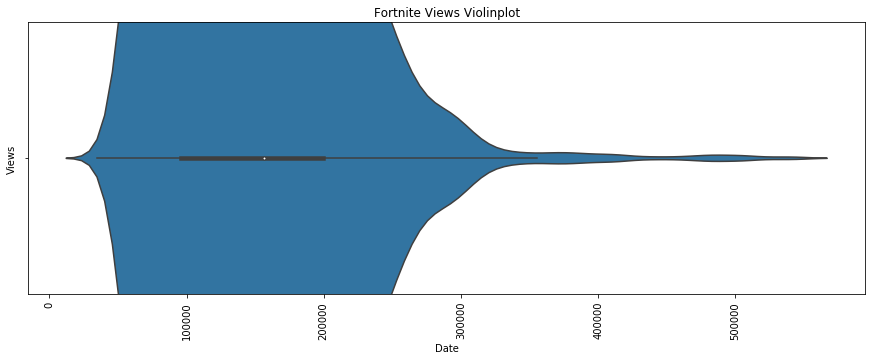

In [29]:

plt.figure(figsize=(15,5))
sns.violinplot(total, width = 3)
# plt.ylim(0, 70000)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Fortnite Views Violinplot")
plt.savefig("Fortnite Views Violinplot2.jpg", dpi=500, bbox_inches='tight')


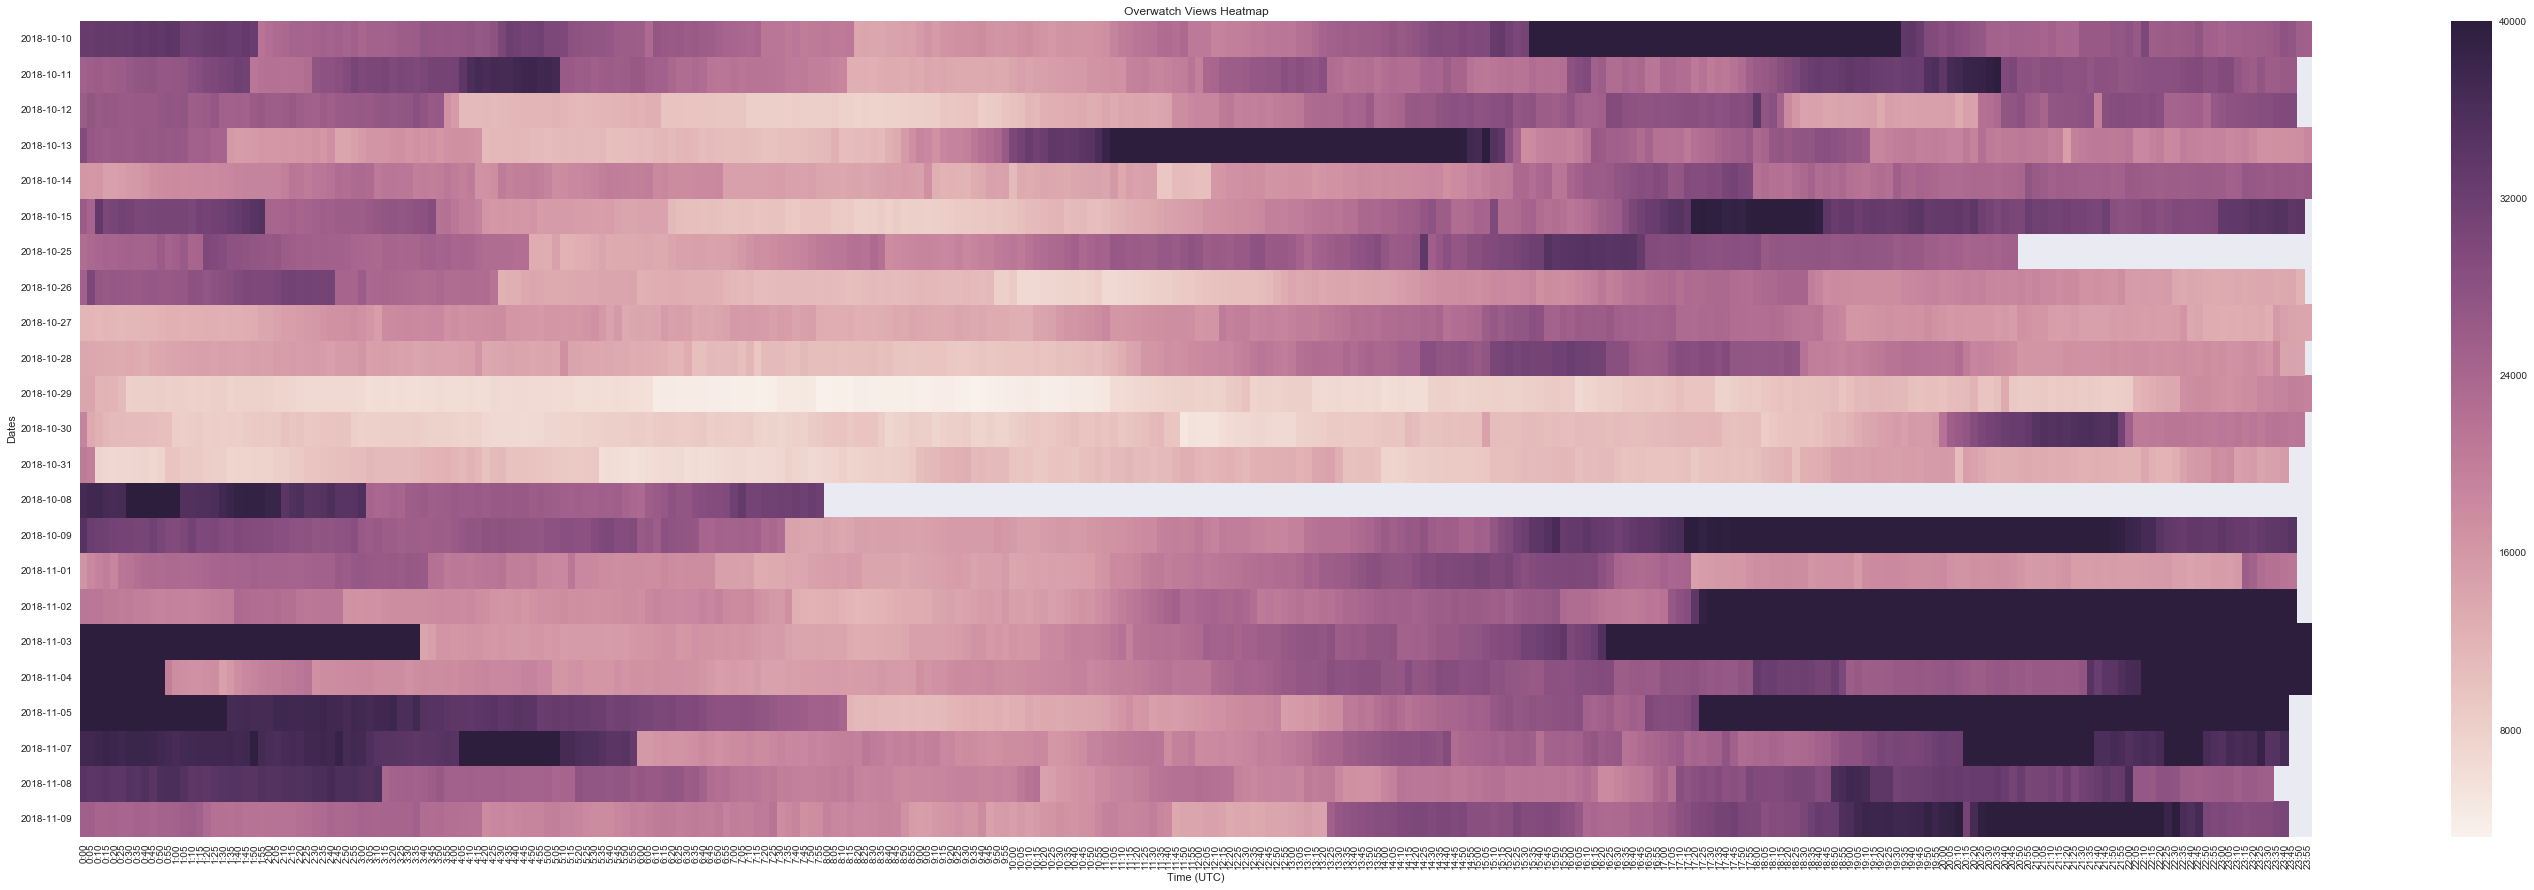

In [226]:

totalx = total.dropna(thresh=(len(df) - 200), axis=1)
plt.figure(figsize=(50,15))
sns.heatmap(totalx.T, vmax = 40000)
#plt.ylim(0, 400000)
plt.xticks(rotation=90)
plt.xlabel("Time (UTC)")
plt.ylabel("Dates")
plt.title("Overwatch Views Heatmap")
plt.savefig("Overwatch Views Heatmap.jpg", dpi=500, bbox_inches='tight')


C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


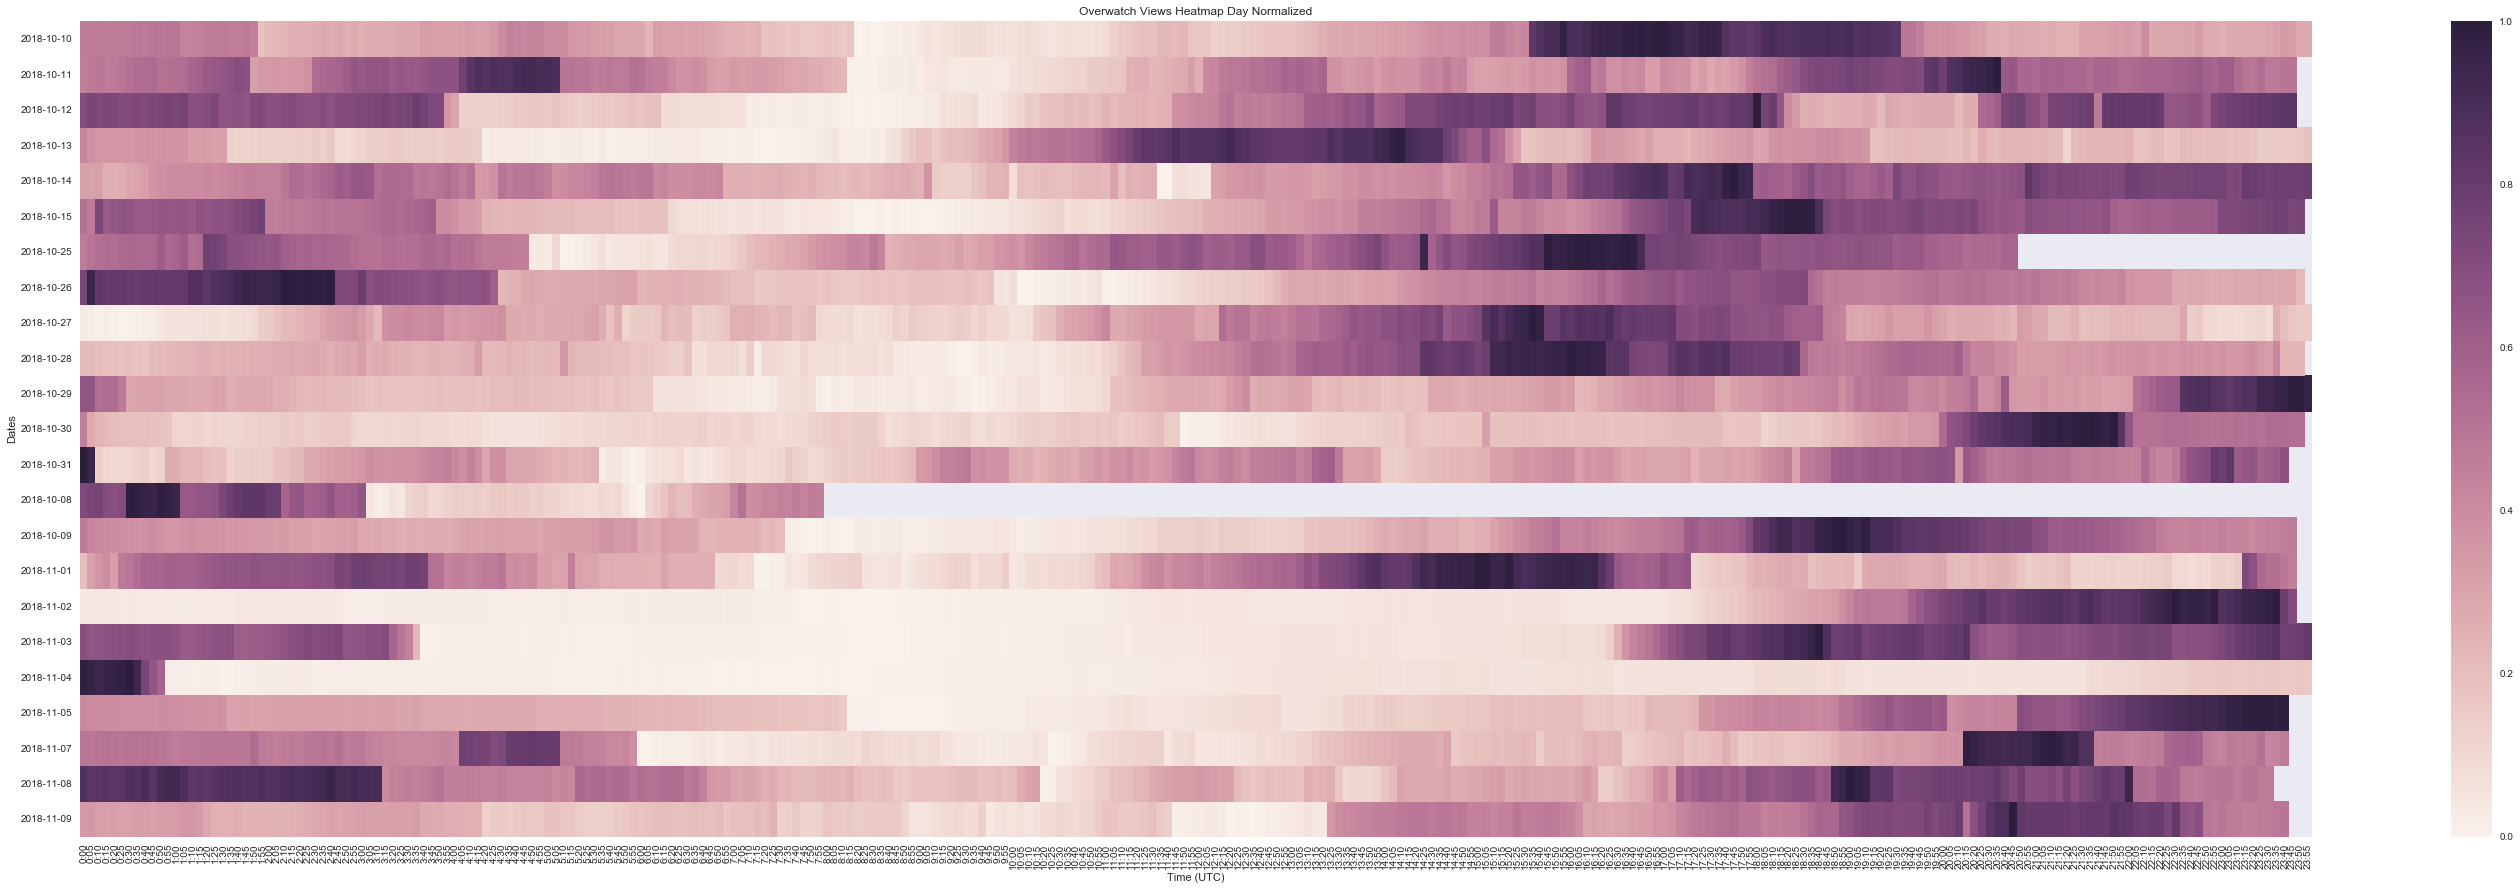

In [225]:
totalx = total.dropna(thresh=(len(df) - 200), axis=1)

for col in totalx.columns:
    mx = max(totalx[col])
    mn = min(totalx[col])
    totalx[col] = (totalx[col] - mn) / (mx - mn)
    

plt.figure(figsize=(50,15))
sns.heatmap(totalx.T)
#plt.ylim(0, 400000)
plt.xticks(rotation=90)
plt.xlabel("Time (UTC)")
plt.ylabel("Dates")
plt.title("Overwatch Views Heatmap Day Normalized")
plt.savefig("Overwatch Views Heatmap Day Normalized.jpg", dpi=500, bbox_inches='tight')


In [149]:
flights_long = sns.load_dataset("flights")

In [150]:
flights_long

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [26]:
file.close()